In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
CDL = pd.read_csv('/Users/macbook/Library/CloudStorage/OneDrive-TheOhioStateUniversity/NLCD and CDL data/CDL_County_Cellwise_55141.csv')
NLCD = pd.read_csv('/Users/macbook/Library/CloudStorage/OneDrive-TheOhioStateUniversity/NLCD and CDL data/NLCD_County_Cellwise_SpatialJoin_55141.csv')

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_1791/3787423957.py:2: DtypeWarning: Columns (25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  NLCD = pd.read_csv('/Users/macbook/Library/CloudStorage/OneDrive-TheOhioStateUniversity/NLCD and CDL data/NLCD_County_Cellwise_SpatialJoin_55141.csv')


In [3]:
# choosing 20000 rows from each dataset
CDL = CDL.sample(n=20000)
NLCD = NLCD.sample(n=20000)

# NLCD

In [4]:
NLCD.head()

,cell,GEOID,CSAFP,CBSAFP,LU_2001,LU_2004,LU_2006,LU_2008,LU_2011,LU_2013,...,MaxTexture,x,y,Slope_Degrees,FIPS_UA00,Name_UA00,Type_UA00,FIPS_UA10,Name_UA10,Type_UA10
2090228,164171183.0,55141,554,49220,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,...,not used,463320.0,2396160.0,0.004483,NaN,NaN,NaN,NaN,NaN,NaN
1570075,158548041.0,55141,554,49220,Developed,Developed,Developed,Developed,Developed,Developed,...,not used,464430.0,2379030.0,0.004043,96832.0,"Wisconsin Rapids, WI",C,96832.0,"Wisconsin Rapids, WI",C
2233496,165737322.0,55141,554,49220,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,...,not used,461910.0,2414220.0,0.000051,NaN,NaN,NaN,NaN,NaN,NaN
1160353,154234264.0,55141,554,49220,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,...,fine-silty over sandy or sandy-skeletal,454230.0,2414760.0,0.002355,NaN,NaN,NaN,NaN,NaN,NaN
252278,143624399.0,55141,554,49220,Cropland,Cropland,Cropland,Cropland,Cropland,Cropland,...,fine-loamy,466350.0,2399070.0,0.066641,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
NLCD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 2090228 to 1137803
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cell           20000 non-null  float64
 1   GEOID          20000 non-null  int64  
 2   CSAFP          20000 non-null  int64  
 3   CBSAFP         20000 non-null  int64  
 4   LU_2001        20000 non-null  object 
 5   LU_2004        20000 non-null  object 
 6   LU_2006        20000 non-null  object 
 7   LU_2008        20000 non-null  object 
 8   LU_2011        20000 non-null  object 
 9   LU_2013        20000 non-null  object 
 10  LU_2016        20000 non-null  object 
 11  LU_2019        20000 non-null  object 
 12  FIPS_cnty      20000 non-null  int64  
 13  FIPS_csa18     20000 non-null  int64  
 14  FIPS_cbsa18    20000 non-null  int64  
 15  AREASYMBOL     20000 non-null  object 
 16  SPATIALVER     20000 non-null  int64  
 17  MUSYM          20000 non-null  object 
 18

In [6]:
print(NLCD['LU_2006'].unique())

['Wetlands' 'Developed' 'Cropland' 'Forest' 'Pasture' 'Other']


# CDL


In [7]:
CDL.head()

,cell,x,y,GEOID,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,...,LU_2009_DRFEWS,LU_2010_DRFEWS,LU_2011_DRFEWS,LU_2012_DRFEWS,LU_2013_DRFEWS,LU_2014_DRFEWS,LU_2015_DRFEWS,LU_2016_DRFEWS,LU_2017_DRFEWS,LU_2018_DRFEWS
1976269,162445337.0,457890,2383800,55141,Herbaceous Wetlands,Herbaceous Wetlands,Woody Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,...,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Pasture,Wetlands,Wetlands,Wetlands,Wetlands
1255384,155112319.0,470640,2397570,55141,Soybeans,Soybeans,Grassland/Pasture,Soybeans,Alfalfa,Grassland/Pasture,...,Cropland,Pasture,Cropland,Pasture,Pasture,Forest,Pasture,Pasture,Pasture,Cropland
1801132,160657157.0,495210,2387160,55141,Soybeans,Deciduous Forest,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,...,Forest,Pasture,Pasture,Pasture,Pasture,Pasture,Pasture,Pasture,Forest,Pasture
9702,140302061.0,483270,2425380,55141,Woody Wetlands,Woody Wetlands,Woody Wetlands,Evergreen Forest,Herbaceous Wetlands,Evergreen Forest,...,Wetlands,Wetlands,Forest,Wetlands,Forest,Forest,Wetlands,Forest,Wetlands,Wetlands
1377655,156358585.0,472440,2395230,55141,Evergreen Forest,Woody Wetlands,Deciduous Forest,Woody Wetlands,Deciduous Forest,Woody Wetlands,...,Wetlands,Forest,Wetlands,Forest,Wetlands,Wetlands,Forest,Wetlands,Forest,Wetlands


In [8]:
not_needed = CDL.columns[15:]
CDL.drop(not_needed, axis=1, inplace=True)
CDL.drop(CDL.columns[:4], axis=1, inplace=True)
CDL.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
1976269,Herbaceous Wetlands,Herbaceous Wetlands,Woody Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Grassland/Pasture,Herbaceous Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Herbaceous Wetlands
1255384,Soybeans,Soybeans,Grassland/Pasture,Soybeans,Alfalfa,Grassland/Pasture,Deciduous Forest,Alfalfa,Alfalfa,Alfalfa,Corn
1801132,Soybeans,Deciduous Forest,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Deciduous Forest,Grassland/Pasture
9702,Woody Wetlands,Woody Wetlands,Woody Wetlands,Evergreen Forest,Herbaceous Wetlands,Evergreen Forest,Evergreen Forest,Herbaceous Wetlands,Evergreen Forest,Woody Wetlands,Herbaceous Wetlands
1377655,Evergreen Forest,Woody Wetlands,Deciduous Forest,Woody Wetlands,Deciduous Forest,Woody Wetlands,Woody Wetlands,Deciduous Forest,Woody Wetlands,Deciduous Forest,Woody Wetlands


In [9]:
products = CDL['LU_2018'].unique()

In [10]:
print(CDL.shape)
print(NLCD.shape)

(20000, 11)
(20000, 30)


In [11]:
# count of each product in a given column of CDL
def count_products(df, col):
    count = {}
    for i in df[col]:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1
    return count

print(count_products(CDL, 'LU_2012')['Corn'])
print(count_products(CDL, 'LU_2011')['Corn'])

corn_counts = CDL.eq('Corn').sum()
# add a new row to the data frame with the corn counts
CDL.loc['Corn Count'] = corn_counts
CDL.tail()
corn_prices_cal = [4.78, 3.81, 3.86, 5.96, 6.67, 6.23, 4.13, 3.67, 3.4, 3.3, 3.41]
corn_prices_mkt = [4.1, 3.59, 5.23, 6.2, 6.92, 4.49, 3.71, 3.52, 3.3, 3.31, 3.59]


2125
1801


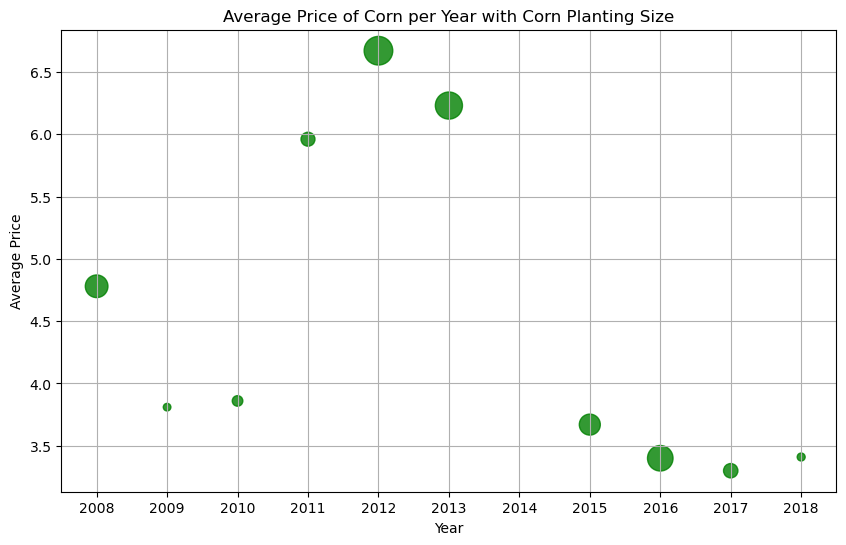

In [27]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
planted_corn = CDL.loc['Corn Count'].values.tolist()
planted_corn = [x - 1700 for x in planted_corn]

plt.figure(figsize=(10, 6))
# plt.scatter(years, corn_prices_mkt, s=planted_corn, c='blue', alpha=0.8)
plt.scatter(years, corn_prices_cal, s=planted_corn, c='green', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(years)
plt.title('Average Price of Corn per Year with Corn Planting Size')
plt.grid(True)
plt.show()

# Separating the rows that we see changes in plantings

In [13]:
# Initialize empty data frames to store similar and dissimilar rows
similar_df = pd.DataFrame()
dissimilar_df = pd.DataFrame()

# Loop through each row of the data frame
for index, row in CDL.iterrows():
    
    # Check if inputs in columns 4-14 are the same
    if row[4:15].nunique() == 1:
        # If they're the same, add the row to the similar data frame
        similar_df = pd.concat([similar_df, row.to_frame().transpose()])
    else:
        # If they're not the same, add the row to the dissimilar data frame
        dissimilar_df = pd.concat([dissimilar_df, row.to_frame().transpose()])

In [22]:
print(similar_df.shape)
print(dissimilar_df.shape)
dissimilar_df.head()

(7618, 11)
(12382, 11)


,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
849209,Deciduous Forest,Soybeans,Corn,Soybeans,Corn,Corn,Soybeans,Corn,Corn,Corn,Corn
419896,Alfalfa,Alfalfa,Grassland/Pasture,Alfalfa,Other Hay/Non Alfalfa,Alfalfa,Other Hay/Non Alfalfa,Alfalfa,Other Hay/Non Alfalfa,Other Hay/Non Alfalfa,Other Hay/Non Alfalfa
80097,Alfalfa,Corn,Oats,Alfalfa,Alfalfa,Corn,Alfalfa,Alfalfa,Corn,Alfalfa,Alfalfa
496814,Soybeans,Oats,Alfalfa,Alfalfa,Corn,Grassland/Pasture,Corn,Soybeans,Corn,Soybeans,Corn
1072865,Alfalfa,Alfalfa,Grassland/Pasture,Grassland/Pasture,Corn,Corn,Alfalfa,Alfalfa,Corn,Alfalfa,Alfalfa


In [25]:
similar_df['LU_2011'].unique()

array(['Deciduous Forest', 'Evergreen Forest', 'Herbaceous Wetlands',
       'Alfalfa', 'Grassland/Pasture', 'Developed/Low Intensity',
       'Open Water', 'Developed/Open Space', 'Woody Wetlands',
       'Shrubland', 'Corn', 'Soybeans', 'Developed/Med Intensity',
       'Developed/High Intensity', 'Mixed Forest', 'Clover/Wildflowers',
       'Oats', 'Dry Beans', 'Winter Wheat', 'Fallow/Idle Cropland'],
      dtype=object)

# Finding what we can have the year after every product

In [13]:
# Define a list to store the results for each product
product_results = []

# Loop through each product in the list
for product in products:

    # Identify which column has the current product entry
    product_col = None
    for col in dissimilar_df.columns:
        if product in dissimilar_df[col].unique():
            product_col = col
            break

    # If no entry for the current product is found, print an error message and skip to the next product
    if product_col is None:
        print(f"Error: no '{product}' entry found in dataframe.")
        continue

    # Find the column index of the column that comes after the current product entry
    product_col_idx = dissimilar_df.columns.get_loc(product_col)
    next_col_idx = product_col_idx + 1

    # If the current product entry is in the last column, print a message saying nothing can be planted the year after and skip to the next product
    if next_col_idx == len(dissimilar_df.columns):
        print(f"The '{product}' entry is in the last column. Nothing can be planted the year after.")
        continue

    # Otherwise, find the unique values that can be planted in the next year after the current product
    next_year_plantings = dissimilar_df.iloc[:, next_col_idx][dissimilar_df[product_col] == product].unique()

    # Store the results for the current product in the product_results list
    product_results.append((product, next_year_plantings))

# Print the results for each product
for product, next_year_plantings in product_results:
    print(f"The following can be planted in the year after '{product}':")
    for planting in next_year_plantings:
        print(planting)

The 'Squash' entry is in the last column. Nothing can be planted the year after.
The following can be planted in the year after 'Deciduous Forest':
Deciduous Forest
Woody Wetlands
Grassland/Pasture
Alfalfa
Evergreen Forest
Mixed Forest
Other Hay/Non Alfalfa
Herbaceous Wetlands
Shrubland
Open Water
Corn
Soybeans
Clover/Wildflowers
Christmas Trees
Oats
Potatoes
The following can be planted in the year after 'Evergreen Forest':
Evergreen Forest
Deciduous Forest
Mixed Forest
Herbaceous Wetlands
Woody Wetlands
Grassland/Pasture
Open Water
Dry Beans
The following can be planted in the year after 'Developed/Med Intensity':
Developed/Med Intensity
Developed/Low Intensity
Developed/High Intensity
Developed/Open Space
The following can be planted in the year after 'Herbaceous Wetlands':
Herbaceous Wetlands
Grassland/Pasture
Woody Wetlands
Deciduous Forest
Evergreen Forest
Open Water
Alfalfa
Soybeans
Winter Wheat
Shrubland
Corn
Other Hay/Non Alfalfa
Mixed Forest
The following can be planted in th

In [14]:
print(product_results[1])
np.shape(product_results)

('Evergreen Forest', array(['Evergreen Forest', 'Deciduous Forest', 'Mixed Forest',
       'Herbaceous Wetlands', 'Woody Wetlands', 'Grassland/Pasture',
       'Open Water', 'Dry Beans'], dtype=object))


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(31, 2)

In [15]:
for i in range(0, np.shape(product_results)[0]):
    difference = np.setdiff1d(products, product_results[i][1])
    print('We cant have the following after', product_results[i][0])
    print(difference)
    print('\n')

We cant have the following after Deciduous Forest
['Barley' 'Barren' 'Cucumbers' 'Developed/High Intensity'
 'Developed/Low Intensity' 'Developed/Med Intensity'
 'Developed/Open Space' 'Dry Beans' 'Fallow/Idle Cropland' 'Herbs' 'Rye'
 'Sorghum' 'Spring Wheat' 'Squash' 'Sweet Potatoes' 'Winter Wheat']


We cant have the following after Evergreen Forest
['Alfalfa' 'Barley' 'Barren' 'Christmas Trees' 'Clover/Wildflowers' 'Corn'
 'Cucumbers' 'Developed/High Intensity' 'Developed/Low Intensity'
 'Developed/Med Intensity' 'Developed/Open Space' 'Fallow/Idle Cropland'
 'Herbs' 'Oats' 'Other Hay/Non Alfalfa' 'Potatoes' 'Rye' 'Shrubland'
 'Sorghum' 'Soybeans' 'Spring Wheat' 'Squash' 'Sweet Potatoes'
 'Winter Wheat']


We cant have the following after Developed/Med Intensity
['Alfalfa' 'Barley' 'Barren' 'Christmas Trees' 'Clover/Wildflowers' 'Corn'
 'Cucumbers' 'Deciduous Forest' 'Dry Beans' 'Evergreen Forest'
 'Fallow/Idle Cropland' 'Grassland/Pasture' 'Herbaceous Wetlands' 'Herbs'
 'Mixed Fore

# Finding out how many times changes occur in the same field (x, y)

### Non-unique:

In [16]:
# Define a function that counts the number of changes in a row
def count_changes(row):
    counter = 0
    for i in range(len(row)-1):
        if row[i] != row[i+1]:
            counter += 1
    return counter

# Apply the count_changes function to each row in the dataframe using the apply() method and store the results in a new column called 'changes'
dissimilar_df['changes'] = dissimilar_df.apply(count_changes, axis=1)

# Print the resulting dataframe
dissimilar_df.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018,changes
267387,Alfalfa,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Deciduous Forest,Deciduous Forest,Herbaceous Wetlands,4
1910248,Open Water,Herbaceous Wetlands,Herbaceous Wetlands,Open Water,Open Water,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,7
728981,Oats,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Corn,Corn,Corn,Fallow/Idle Cropland,Alfalfa,4
763903,Corn,Corn,Corn,Corn,Corn,Soybeans,Corn,Soybeans,Corn,Alfalfa,Soybeans,6
1927568,Woody Wetlands,Herbaceous Wetlands,Woody Wetlands,Woody Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Herbaceous Wetlands,7


In [17]:
print('In average, we see ' + str(np.mean(dissimilar_df['changes'])) + ' changes per row')

In average, we see 5.483467741935484 changes per row


### Unique:

In [18]:
# Define a function that counts the number of unique changes in a row
def count_unique_changes(row):
    changes = {}
    for i in range(len(row)-1):
        if row[i] != row[i+1]:
            pair = (row[i], row[i+1])
            if pair not in changes:
                changes[pair] = 1
    return len(changes)-1

# Apply the count_unique_changes function to each row in the dataframe using the apply() method and store the results in a new column called 'unique_changes_count'
dissimilar_df['unique_changes_count'] = dissimilar_df.apply(count_unique_changes, axis=1)

# Print the resulting dataframe
dissimilar_df.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018,changes,unique_changes_count
267387,Alfalfa,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Deciduous Forest,Deciduous Forest,Herbaceous Wetlands,4,4
1910248,Open Water,Herbaceous Wetlands,Herbaceous Wetlands,Open Water,Open Water,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,7,2
728981,Oats,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Corn,Corn,Corn,Fallow/Idle Cropland,Alfalfa,4,4
763903,Corn,Corn,Corn,Corn,Corn,Soybeans,Corn,Soybeans,Corn,Alfalfa,Soybeans,6,4
1927568,Woody Wetlands,Herbaceous Wetlands,Woody Wetlands,Woody Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Herbaceous Wetlands,7,6


In [19]:
print('In average, we see ' + str(np.mean(dissimilar_df['unique_changes_count'])) + ' unique changes per row')

In average, we see 4.249758064516129 unique changes per row


# Finding the changes between two consecutive years

In [20]:
# create a list of year columns
years = dissimilar_df.columns

# loop through the years
for i in range(len(years) - 1):
    # create a new data frame with just the fields for the current year and the next year
    current_year = years[i]
    next_year = years[i+1]
    df_year = dissimilar_df[[current_year, next_year]]

    # get the most frequent changes from the current year to the next year
    changes = df_year.groupby([current_year, next_year]).size().reset_index(name='count')
    changes = changes.sort_values(by='count', ascending=False)

    # store the results in a separate data frame
    df_changes = pd.DataFrame({'From': changes[current_year], 'To': changes[next_year], 'Count': changes['count']})

    # write the data frame to a CSV file
    filename = 'changes_{}_{}.csv'.format(current_year[-4:], next_year[-4:])
    df_changes.to_csv(filename, index=False)

In [39]:
# loop through the years
for i in range(len(years) - 3):
    # create a new data frame with just the fields for the current year and the next year
    current_year = years[i]
    next_year = years[i+1]
    df_year = dissimilar_df[[current_year, next_year]]

    # get the most frequent changes from the current year to the next year
    changes = df_year.groupby([current_year, next_year]).size().reset_index(name='count')
    changes = changes.sort_values(by='count', ascending=False)

    # store the results in a separate data frame
    df_changes = pd.DataFrame({'From': changes[current_year], 'To': changes[next_year], 'Count': changes['count']})

    # only keep rows where the "From" column is different from the "To" column
    df_changes = df_changes[df_changes['From'] != df_changes['To']]

    # print the resulting data frame
    print('Changes from {} to {}:'.format(current_year[-4:], next_year[-4:]))
    print(df_changes.head(2))
    print('\n')
    
# # read in the CSV file for the changes from 2008 to 2009
# df_changes = pd.read_csv('changes_2009_2010.csv')


# WHY WE SEE LOTS OF CORN->SOYBEANS AND SOYBEANS->CORN CHANGES:
# Compared to other crops, corn needs lots of nutrients, especially nitrogen. 
# This makes soybeans a good crop to alternate with corn, because soybeans have 
# nodules on their roots that host bacteria that fix atmospheric nitrogen.

Changes from 2008 to 2009:
               From                To  Count
226  Woody Wetlands  Deciduous Forest    513
48             Corn          Soybeans    424


Changes from 2009 to 2010:
               From                To  Count
50             Corn          Soybeans    517
264  Woody Wetlands  Deciduous Forest    429


Changes from 2010 to 2011:
                  From              To  Count
75    Deciduous Forest  Woody Wetlands    542
120  Grassland/Pasture         Alfalfa    487


Changes from 2011 to 2012:
       From                     To  Count
39     Corn               Soybeans    555
8   Alfalfa  Other Hay/Non Alfalfa    532


Changes from 2012 to 2013:
                 From                To  Count
89   Deciduous Forest    Woody Wetlands    504
245    Woody Wetlands  Deciduous Forest    473


Changes from 2013 to 2014:
                From              To  Count
49              Corn        Soybeans    484
82  Deciduous Forest  Woody Wetlands    447


Changes from 2014 t

In [31]:
# read in the CSV file for the changes from 2008 to 2009
df_changes = pd.read_csv('changes_2009_2010.csv')

print('changes from:')
for product in products:
    df_changes = pd.read_csv('changes_2009_2010.csv')
    # only keep rows where the "From" column is Corn
    df_changes = df_changes[df_changes['From'] != df_changes['To']]
    df_changes = df_changes[df_changes['From'] == product]

    # print the sum of the "Count" column
    print(str(product) + ': ' + str(df_changes['Count'].sum()))
print('\n\n')
print('changes to:')
for product in products:
    df_changes = pd.read_csv('changes_2009_2010.csv')
    # only keep rows where the "From" column is Corn
    df_changes = df_changes[df_changes['From'] != df_changes['To']]
    df_changes = df_changes[df_changes['To'] == product]

    # print the sum of the "Count" column
    print(str(product) + ': ' + str(df_changes['Count'].sum()))

12400
for Deciduous Forest: 1093
for Evergreen Forest: 218
for Developed/Med Intensity: 8
for Herbaceous Wetlands: 325
for Alfalfa: 1069
for Soybeans: 487
for Woody Wetlands: 583
for Developed/Open Space: 40
for Corn: 917
for Open Water: 57
for Other Hay/Non Alfalfa: 357
for Developed/Low Intensity: 36
for Grassland/Pasture: 1150
for Potatoes: 31
for Shrubland: 45
for Christmas Trees: 1
for Mixed Forest: 119
for Clover/Wildflowers: 23
for Winter Wheat: 84
for Fallow/Idle Cropland: 6
for Sorghum: 0
for Dry Beans: 32
for Developed/High Intensity: 0
for Barley: 20
for Oats: 122
for Barren: 2
for Herbs: 1
for Spring Wheat: 4
for Cucumbers: 1
for Rye: 1
for Sweet Potatoes: 0
for Squash: 0



for Deciduous Forest: 1077
for Evergreen Forest: 218
for Developed/Med Intensity: 6
for Herbaceous Wetlands: 538
for Alfalfa: 503
for Soybeans: 656
for Woody Wetlands: 549
for Developed/Open Space: 30
for Corn: 875
for Open Water: 30
for Other Hay/Non Alfalfa: 641
for Developed/Low Intensity: 28
for Gra